# 解释RSSI随频率和距离的变化

In [1]:
import logging
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sys
sys.path.extend(['d:\\atom\\python'])
import data_manager as dm
import data_generator as dg
import plot_helper as plotter

In [2]:
logging.warning('差异性，相似性的量化')

## RSSI随频率的变化

In [3]:
d = 0.38

以38cm为例，理论上RSSI随距离的变化为

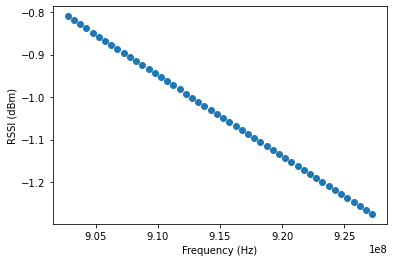

In [4]:
rssi = []
freqs = np.array(dm.channels) * 10**6
for freq in freqs:
    rssi.append(dg.calc_rssi(freq, d))

plt.ylabel('RSSI (dBm)')
plt.xlabel('Frequency (Hz)')
plt.scatter(freqs, rssi)
plt.show()

但实际上的测量值却有很大波动：
#### 不同液体有差异性

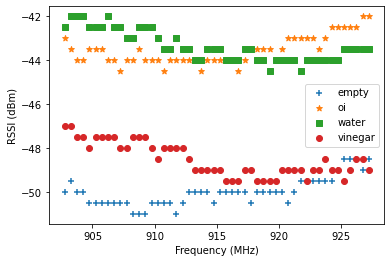

In [5]:
plotter.plot_mr_dist('empty', d, 'RSSI', '+', 'empty')
plotter.plot_mr_dist('oil', d, 'RSSI', '*', 'oi')
plotter.plot_mr_dist('water', d, 'RSSI', 's', 'water')
plotter.plot_mr_dist('vinegar', d, 'RSSI', 'o', 'vinegar')

plt.ylabel('RSSI (dBm)')
plt.xlabel('Frequency (MHz)')
plt.legend()
plt.show()

#### 相同液体有相似性
同样都是水：

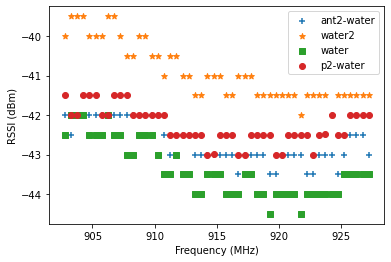

In [6]:
plotter.plot_mr_dist('ant_water', d, 'RSSI', '+', 'ant2-water')
plotter.plot_mr_dist('water2', d, 'RSSI', '*', 'water2')
plotter.plot_mr_dist('water', d, 'RSSI', 's', 'water')
plotter.plot_mr_dist('p_water', d, 'RSSI', 'o', 'p2-water')

plt.ylabel('RSSI (dBm)')
plt.xlabel('Frequency (MHz)')
plt.legend()
plt.show()

38cm很像，50cm时water和其他不像

#### 解释
不同频率下，液体介电系数不同，导致标签的阻抗不同，导致$G_t$和$T_b$不同

## RSSI随距离的变化

In [7]:
f = 927.25 * 10**6

以902.75MHz为例，RSSI随距离的变化理论上应该是

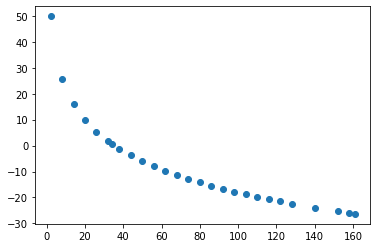

In [8]:
rssi = []
dists = np.array(dm.dists_mr) / 100
for dist in dists:
    rssi.append(dg.calc_rssi(f, dist))

plt.scatter(dists*100, rssi)
plt.show()

而实际的测量值为：
#### 不同液体有差异性

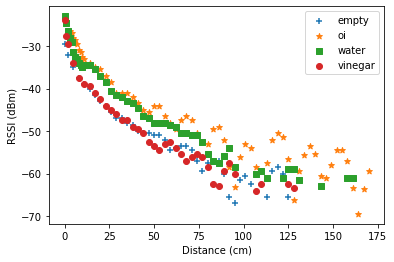

In [9]:
plotter.plot_mr_freq('empty', f, 'RSSI', '+', 'empty')
plotter.plot_mr_freq('oil', f, 'RSSI', '*', 'oi')
plotter.plot_mr_freq('water', f, 'RSSI', 's', 'water')
plotter.plot_mr_freq('vinegar', f, 'RSSI', 'o', 'vinegar')

plt.xlabel('Distance (cm)')
plt.ylabel('RSSI (dBm)')
plt.legend()
plt.show()

空瓶和油的波动性大致在 [52, 69, 86, 103, 120]，水和醋的波动性大致在 [17, 34, 51, 68, 85, 102, 119, 136, 153]，间距都在17，即半个波长，波动周期一致，但是相位和幅度不一致。

In [10]:
logging.warning('为什么波动的相位和幅度不同')

再看实验室采集的数据

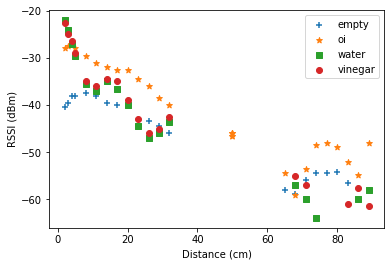

In [11]:
plotter.plot_lab_freq('empty', f, 'RSSI', '+', 'empty')
plotter.plot_lab_freq('oil', f, 'RSSI', '*', 'oi')
plotter.plot_lab_freq('water', f, 'RSSI', 's', 'water')
plotter.plot_lab_freq('vinegar', f, 'RSSI', 'o', 'vinegar')

plt.xlabel('Distance (cm)')
plt.ylabel('RSSI (dBm)')
plt.legend()
plt.show()

虽然不全，但是大致还是能看到半个波长的周期性波动，水和醋的周期大致是 [15, 32, 49, 66, 83]，空瓶和油的大致是 [6, 23, 40, 57, 74]

#### 相同液体有相似性

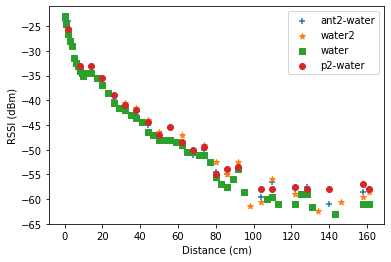

In [12]:
plotter.plot_mr_freq('ant_water', f, 'RSSI', '+', 'ant2-water')
plotter.plot_mr_freq('water2', f, 'RSSI', '*', 'water2')
plotter.plot_mr_freq('water', f, 'RSSI', 's', 'water')
plotter.plot_mr_freq('p_water', f, 'RSSI', 'o', 'p2-water')

plt.xlabel('Distance (cm)')
plt.ylabel('RSSI (dBm)')
plt.legend()
plt.show()